Zadanie 5.

Celem zadania jest analiza procesu ruiny modelu Cramera-Lundberga obliczanego na podstawie wzoru:

\begin{equation*}
    X_t=u +ct - \sum^{N_t}_{i=0}\xi_i
\end{equation*}

gdzie $c,t,u\geq0, \xi_i~Exp(\eta), \xi_i \perp \xi_j, i \neq j \mathbb{E}(\xi_i)=\eta$, $N_t$ jest procesem Poissona z intensywnością $\lambda$. Czasem ruiny klasycznej nazywamy $\tau = inf\left(t>0|X_t<0\right)$.

Część pierwsza

Celem tej części zadania jest symulacyjne wyznaczenie prawdopodobieństwa ruiny w czasie nieskończonym danego wzorem $\pi(u,c)=P(\tau<\infty)$ i zweryfikowanie poprawności wyniku przy pomocy wzoru Pollaczka-Chinczyna:

\begin{equation}
    \psi (u,c) = \frac{\eta \lambda}{c} e^{-u\left( \frac{1}{\eta} -\frac{\lambda}{c}\right)}
\end{equation}

Zaczynamy od wczytania potrzebnych bibliotek i zdefiniowania funkcji.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import random
from scipy.special import lambertw

def proces_poissona(T, lambda_):
    """
    Zwraca proces Poissona z parametrem lambda_, dla horyzontu czasowego T.
    
    Input:
    lambda_ (float): Intensywność procesu Poissona.
    T (float): Horyzont czasowy.
    
    Output:
    np.ndarray: Tabela skoków procesu.
    """
    t = 0
    times = []
    while t < T:
        t += np.random.exponential(1 / lambda_)
        if t < T:
            times.append(t)
    return np.array(times)

def zlozony_proces_poissona(T, lambd, zeta):
    proces = proces_poissona(T, lambd)  # czasy nastąpienia skoku
    skoki = scipy.stats.expon.rvs(size=len(proces) - 1, scale=1 / zeta)  # lambda=1/scale scale=1/lambda lamba=1/10
    skoki = [0] + skoki.tolist()
    return proces, skoki

def liniowosc(c, t):
    return c * t

def proces_ryzyka(r_0, c, funckja_zyskow, T, lambd, zeta):

    times = zlozony_proces_poissona(T, lambd, zeta)[0]
    momenty_skokow = times
    wielkosc_skokow = zlozony_proces_poissona(T, lambd, zeta)[1]
    l = 0
    R_list = []

    for k in range(len(momenty_skokow)):
        i = momenty_skokow[k]
        spadek = sum(wielkosc_skokow[:l])
        R = r_0 + funckja_zyskow(c, i) - spadek
        if R <= 0: # jesli kapital rowny lub mnijeszy od 0 -> STOP
            R_list.append(R)
            break
        R_list.append(R)
        l += 1

    return (R_list, momenty_skokow[: len(R_list)])


In [2]:


def ruina(r_0, c, funckja_zyskow, T, lamb, k):
    times = zlozony_proces_poissona(T, lamb, k)[0]
    momenty_skokow = times
    wielkosc_skokow = zlozony_proces_poissona(T, lamb, k)[1]
    l = 0
    R_list = []

    for k in range(len(momenty_skokow)):
        i = momenty_skokow[k]
        spadek = sum(wielkosc_skokow[:l])
        R = r_0 + funckja_zyskow(c, i) - spadek
        if R <= 0:
            R_list.append(R)
            return (
                True  # kapitał <=0 --> ruina
            )
        R_list.append(R)
        l += 1
    return False # kapital > 0 --> brak ruiny


def prawdopodobienstwo_ruiny(r_0, c, funkcja_zyskow, T, lamb, k, num_simulations):
    ruin_count = 0
    for _ in range(num_simulations):
        if ruina(r_0, c, funkcja_zyskow, T, lamb, k): # ruina dodajemy 1
            ruin_count += 1
    return ruin_count / num_simulations

Dalej wyznaczamy wartości prawdopodobieństwa w zależności od parametru c korzystając ze wzoru (1) ustalamy parametry następująco:

In [3]:
    
T = 100
k = 1 / 20  
lamb = 2  
eta = 1 / k

r_0_values = [20, 50, 100, 200]
c_values = np.linspace(40.1, 100, 10)  # 35


probabilities_ruin_theoretical = []
for r_0 in r_0_values:
    probabilities = [np.exp(-(1 / eta - lamb / c) * r_0) * (eta * lamb / c) for c in c_values]
    probabilities_ruin_theoretical.append(probabilities)

probabilities_ruin_sim = []
for r_0 in r_0_values:
    probabilities = [prawdopodobienstwo_ruiny(r_0, c, liniowosc, T, lamb, k, num_simulations=1000) for c in c_values]
    probabilities_ruin_sim.append(probabilities)


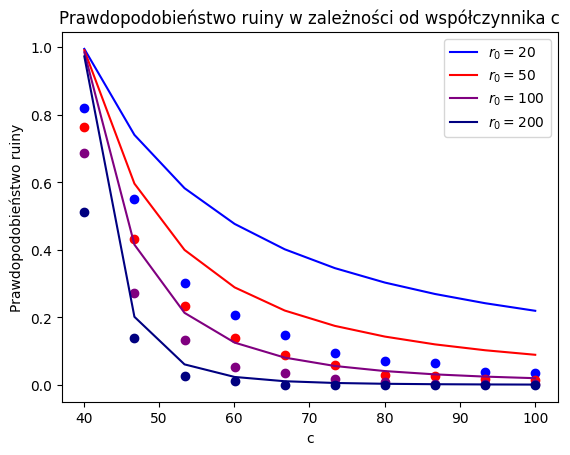

In [4]:

plt.plot(c_values, probabilities_ruin_sim[0], "o", color="blue")  # 20
plt.plot(c_values, probabilities_ruin_theoretical[0], color="blue", label="$r_0=20$")

plt.plot(c_values, probabilities_ruin_sim[1], "o", color="red")  # 50
plt.plot(c_values, probabilities_ruin_theoretical[1], color="red", label="$r_0=50$")

plt.plot(c_values, probabilities_ruin_sim[2], "o", color="purple")  # 100
plt.plot(c_values, probabilities_ruin_theoretical[2], color="purple", label="$r_0=100$")

plt.plot(c_values, probabilities_ruin_sim[3], "o", color="navy")  # 200
plt.plot(c_values, probabilities_ruin_theoretical[3], color="navy", label="$r_0=200$")

plt.xlabel("c")
plt.ylabel("Prawdopodobieństwo ruiny")
plt.title("Prawdopodobieństwo ruiny w zależności od współczynnika c")
plt.legend()
plt.show()

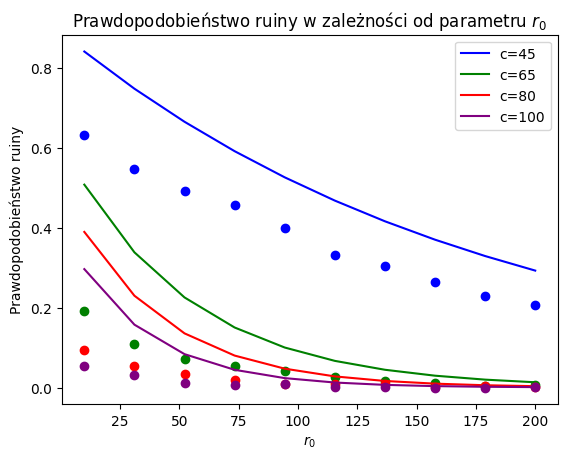

In [5]:
c_values = [45, 65, 80, 100]
r_0_values = np.linspace(10, 200, 10)  # 35


probabilities_ruin_theoretical = []
for c in c_values:
    probabilities = [np.exp(-(1 / eta - lamb / c) * r_0) * (eta * lamb / c) for r_0 in r_0_values]
    probabilities_ruin_theoretical.append(probabilities)

probabilities_ruin_sim = []
for c in c_values:
    probabilities = [prawdopodobienstwo_ruiny(r_0, c, liniowosc, T, lamb, k, num_simulations=1000) for r_0 in r_0_values]
    probabilities_ruin_sim.append(probabilities)
# dla kolejnych r_0

plt.plot(r_0_values, probabilities_ruin_sim[0], "o", color="blue")  # 20
plt.plot(r_0_values, probabilities_ruin_theoretical[0], color="blue", label="c=45")

plt.plot(r_0_values, probabilities_ruin_sim[1], "o", color="green")  # 50
plt.plot(r_0_values, probabilities_ruin_theoretical[1], color="green", label="c=65")

plt.plot(r_0_values, probabilities_ruin_sim[2], "o", color="red")  # 100
plt.plot(r_0_values, probabilities_ruin_theoretical[2], color="red", label="c=80")

plt.plot(r_0_values, probabilities_ruin_sim[3], "o", color="purple")  # 200
plt.plot(r_0_values, probabilities_ruin_theoretical[3], color="purple", label="c=100")

plt.xlabel("$r_0$")
plt.ylabel("Prawdopodobieństwo ruiny")
plt.title("Prawdopodobieństwo ruiny w zależności od parametru $r_0$")
plt.legend()
plt.show()

Po prześledzeniu wykresów widzimy, że oszacowanie jest tym lepsze im mniejsza wartość stałych współczynników.
